In [139]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from tqdm import tqdm
import pickle

import nltk
from nltk.tokenize import word_tokenize, RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix

In [58]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /Users/vitika/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/vitika/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [4]:
data = pd.read_csv("complaints.csv")

/var/folders/7k/v5m4pc4910z7qcd4v14fhypr0000gn/T/ipykernel_97479/1251114380.py:1: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("complaints.csv")


In [42]:
data.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2024-02-08,Credit reporting or other personal consumer re...,Credit reporting,Problem with a company's investigation into an...,Their investigation did not fix an error on yo...,NaN,NaN,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",NY,11572,NaN,NaN,Web,2024-02-08,In progress,Yes,NaN,8309986
1,2024-03-02,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",GA,30319,NaN,NaN,Web,2024-03-02,In progress,Yes,NaN,8452450
2,2024-02-08,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",TX,77406,NaN,NaN,Phone,2024-02-08,In progress,Yes,NaN,8309609
3,2024-03-02,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",SC,29481,NaN,NaN,Web,2024-03-02,In progress,Yes,NaN,8452526
4,2024-01-22,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,Experian Information Solutions Inc.,TN,37217,NaN,NaN,Web,2024-01-22,In progress,Yes,NaN,8195574


In [43]:
data.shape

(4808749, 18)

In [44]:
# Accessing Columns
data["Issue"]

0          Problem with a company's investigation into an...
1                       Incorrect information on your report
2                       Incorrect information on your report
3                       Incorrect information on your report
4                                Improper use of your report
                                 ...                        
4808744                 Incorrect information on your report
4808745    Problem with additional add-on products or ser...
4808746                           Struggling to pay mortgage
4808747                          Improper use of your report
4808748           Charged fees or interest you didn't expect
Name: Issue, Length: 4808749, dtype: object

In [9]:
# Accessing rows
data.loc[20]

Date received                                                          2024-02-09
Product                         Credit reporting or other personal consumer re...
Sub-product                                                      Credit reporting
Issue                                                 Improper use of your report
Sub-issue                       Credit inquiries on your report that you don't...
Consumer complaint narrative                                                  NaN
Company public response                                                       NaN
Company                                    TRANSUNION INTERMEDIATE HOLDINGS, INC.
State                                                                          AL
ZIP code                                                                    35215
Tags                                                                          NaN
Consumer consent provided?                                                    NaN
Submitted via   

In [10]:
# Accessing rows
data.loc[20]

Date received                                                          2024-02-09
Product                         Credit reporting or other personal consumer re...
Sub-product                                                      Credit reporting
Issue                                                 Improper use of your report
Sub-issue                       Credit inquiries on your report that you don't...
Consumer complaint narrative                                                  NaN
Company public response                                                       NaN
Company                                    TRANSUNION INTERMEDIATE HOLDINGS, INC.
State                                                                          AL
ZIP code                                                                    35215
Tags                                                                          NaN
Consumer consent provided?                                                    NaN
Submitted via   

In [11]:
data.iloc[20, 3]

'Improper use of your report'

In [12]:
data.loc[20, "Issue"]

'Improper use of your report'

In [13]:
data["Issue"][20]

'Improper use of your report'

# Select only "Product" and "Consumer complaint narrative" column.

In [14]:
data[["Product", "Consumer complaint narrative"]]

,Product,Consumer complaint narrative
0,Credit reporting or other personal consumer re...,NaN
1,Credit reporting or other personal consumer re...,NaN
2,Credit reporting or other personal consumer re...,NaN
3,Credit reporting or other personal consumer re...,NaN
4,Credit reporting or other personal consumer re...,NaN
...,...,...
4808744,"Credit reporting, credit repair services, or o...",NaN
4808745,"Payday loan, title loan, or personal loan",NaN
4808746,Mortgage,NaN
4808747,"Credit reporting, credit repair services, or o...",NaN


In [15]:
data_df = data[["Product", "Consumer complaint narrative"]]

In [16]:
data_df.head()

,Product,Consumer complaint narrative
0,Credit reporting or other personal consumer re...,NaN
1,Credit reporting or other personal consumer re...,NaN
2,Credit reporting or other personal consumer re...,NaN
3,Credit reporting or other personal consumer re...,NaN
4,Credit reporting or other personal consumer re...,NaN


In [17]:
data_df.isna().sum()

Product                               0
Consumer complaint narrative    3094431
dtype: int64

In [18]:
data_df.dropna(inplace = True)

/var/folders/7k/v5m4pc4910z7qcd4v14fhypr0000gn/T/ipykernel_97479/431024682.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df.dropna(inplace = True)


In [19]:
data_df.shape

(1714318, 2)

In [20]:
data_df.head()

,Product,Consumer complaint narrative
144,Checking or savings account,On XX/XX/XXXX Wells Fargo closed our Business ...
187,Credit card,US Bank abruptly closed my accounts for both t...
200,Mortgage,In XXXX XXXX XXXXXXXX I noticed a major increa...
222,Mortgage,I am writing to lodge a formal complaint forde...
236,Credit card,I submitted an application for a credit card w...


# Rename column name

In [21]:
data_df.rename({"Consumer complaint narrative" : "Complaint"}, axis = 1, inplace = True)

/var/folders/7k/v5m4pc4910z7qcd4v14fhypr0000gn/T/ipykernel_97479/1276683564.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df.rename({"Consumer complaint narrative" : "Complaint"}, axis = 1, inplace = True)


In [22]:
data_df.head()

,Product,Complaint
144,Checking or savings account,On XX/XX/XXXX Wells Fargo closed our Business ...
187,Credit card,US Bank abruptly closed my accounts for both t...
200,Mortgage,In XXXX XXXX XXXXXXXX I noticed a major increa...
222,Mortgage,I am writing to lodge a formal complaint forde...
236,Credit card,I submitted an application for a credit card w...


In [23]:
data_df["Product"].value_counts()

Product
Credit reporting, credit repair services, or other personal consumer reports    807297
Debt collection                                                                 236380
Credit reporting or other personal consumer reports                             137192
Mortgage                                                                        114091
Credit card or prepaid card                                                     108669
Checking or savings account                                                      88566
Student loan                                                                     40543
Money transfer, virtual currency, or money service                               37432
Credit card                                                                      33560
Credit reporting                                                                 31587
Vehicle loan or lease                                                            28900
Payday loan, title loan, or persona

In [24]:
product_map = {"Credit reporting, credit repair services, or other personal consumer reports" : "credit_report",
               "Credit reporting or other personal consumer reports" : "credit_report",
               "Debt collection" : "debt_collection",
               "Checking or savings account" : "savings_account",
               "Credit card or prepaid card" : "card",
               "Mortgage" : "mortgage",
               "Credit card" : "card",
               "Money transfer, virtual currency, or money service" : "money_transfer",
               "Vehicle loan or lease" : "vehicle_loan",
               "Student loan" : "loan",
               "Payday loan, title loan, or personal loan" : "loan",
               "Payday loan, title loan, personal loan, or advance loan" : "loan",
               "Prepaid card" : "card",
               "Debt or credit management" : "card",
               "Bank account or service" : "savings_account",
               "Credit reporting" : "credit_report",
               "Other financial service" : "others",
               "Consumer Loan" : "loan",
               "Payday loan" : "loan"}

In [25]:
data_df.replace({"Product" : product_map}, inplace = True)

/var/folders/7k/v5m4pc4910z7qcd4v14fhypr0000gn/T/ipykernel_97479/361946716.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df.replace({"Product" : product_map}, inplace = True)


In [26]:
data_df

,Product,Complaint
144,savings_account,On XX/XX/XXXX Wells Fargo closed our Business ...
187,card,US Bank abruptly closed my accounts for both t...
200,mortgage,In XXXX XXXX XXXXXXXX I noticed a major increa...
222,mortgage,I am writing to lodge a formal complaint forde...
236,card,I submitted an application for a credit card w...
...,...,...
4808586,card,I sent Capital One written correspondent about...
4808631,mortgage,On XXXX I applied for a home improvement loan ...
4808665,money_transfer,"On XX/XX/XXXX, at approximately XXXX. EST, I r..."
4808670,debt_collection,I have an injury committed by GENERAL MOTORS F...


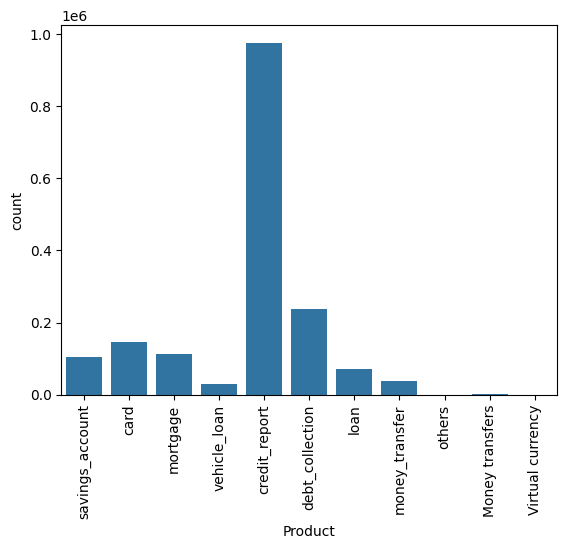

In [33]:
sns.countplot(x = "Product", data = data_df)
plt.xticks(rotation = 90)
plt.show()

In [34]:
data_df["Product"].value_counts()

Product
credit_report       976076
debt_collection     236380
card                145532
mortgage            114091
savings_account     103451
loan                 70651
money_transfer       37432
vehicle_loan         28900
Money transfers       1497
others                 292
Virtual currency        16
Name: count, dtype: int64

In [35]:
# Prepare the list on Complaints - so we can iterate over it.
complaints = list(data_df["Complaint"])

In [41]:
complaints = [sent.lower() for sent in tqdm(complaints)]

100%|█████████████████████████████| 1714318/1714318 [00:03<00:00, 452211.04it/s]


In [45]:
complaints[15]

'dear transunion i was a victim of identity theft. per the fair credit reporting act section 605b ( a ) ( 2 ) you are required to remove any accounts opened without my knowledge, consent, or authority. also in addition to section 1681c-2 ( a ) you are required to block any information in the file that i have identified that resulted from identity theft. the following items need to be removed and blocked as they are fraudulent. \n\n\n1. 15 u.s. code 1692g - validation of debts xxxx xxxx account number : xxxx please update- all new reporting information to- paid as agreed and current 2. 15 u.s. code 1681i - procedure in case of disputed accuracy xxxx  account number : xxxx please update- all new reporting information to- paid as agreed and current 3. 15 u.s. code 1692g - validation of debts xxxx account number : xxxx please update- all new reporting information to- paid as agreed and current 4. 15 u.s. code 1681i - procedure in case of disputed accuracy xxxx account number : xxxx delete 

# Tokenization

In [56]:
complaints = [word_tokenize(sent) for sent in tqdm(complaints)]

100%|████████████████████████████████| 1714318/1714318 [32:11<00:00, 887.75it/s]


In [60]:
complaints[15]

['dear',
 'transunion',
 'i',
 'was',
 'a',
 'victim',
 'of',
 'identity',
 'theft',
 '.',
 'per',
 'the',
 'fair',
 'credit',
 'reporting',
 'act',
 'section',
 '605b',
 '(',
 'a',
 ')',
 '(',
 '2',
 ')',
 'you',
 'are',
 'required',
 'to',
 'remove',
 'any',
 'accounts',
 'opened',
 'without',
 'my',
 'knowledge',
 ',',
 'consent',
 ',',
 'or',
 'authority',
 '.',
 'also',
 'in',
 'addition',
 'to',
 'section',
 '1681c-2',
 '(',
 'a',
 ')',
 'you',
 'are',
 'required',
 'to',
 'block',
 'any',
 'information',
 'in',
 'the',
 'file',
 'that',
 'i',
 'have',
 'identified',
 'that',
 'resulted',
 'from',
 'identity',
 'theft',
 '.',
 'the',
 'following',
 'items',
 'need',
 'to',
 'be',
 'removed',
 'and',
 'blocked',
 'as',
 'they',
 'are',
 'fraudulent',
 '.',
 '1',
 '.',
 '15',
 'u.s.',
 'code',
 '1692g',
 '-',
 'validation',
 'of',
 'debts',
 'xxxx',
 'xxxx',
 'account',
 'number',
 ':',
 'xxxx',
 'please',
 'update-',
 'all',
 'new',
 'reporting',
 'information',
 'to-',
 'paid',
 

# Remove Stop Words

In [61]:
stop_words = (stopwords.words('english'))

In [62]:
complaints = [[word for word in sent if word not in stop_words] for sent in tqdm(complaints)]

100%|███████████████████████████████| 1714318/1714318 [21:02<00:00, 1357.56it/s]


In [64]:
complaints[15]

['dear',
 'transunion',
 'victim',
 'identity',
 'theft',
 '.',
 'per',
 'fair',
 'credit',
 'reporting',
 'act',
 'section',
 '605b',
 '(',
 ')',
 '(',
 '2',
 ')',
 'required',
 'remove',
 'accounts',
 'opened',
 'without',
 'knowledge',
 ',',
 'consent',
 ',',
 'authority',
 '.',
 'also',
 'addition',
 'section',
 '1681c-2',
 '(',
 ')',
 'required',
 'block',
 'information',
 'file',
 'identified',
 'resulted',
 'identity',
 'theft',
 '.',
 'following',
 'items',
 'need',
 'removed',
 'blocked',
 'fraudulent',
 '.',
 '1',
 '.',
 '15',
 'u.s.',
 'code',
 '1692g',
 '-',
 'validation',
 'debts',
 'xxxx',
 'xxxx',
 'account',
 'number',
 ':',
 'xxxx',
 'please',
 'update-',
 'new',
 'reporting',
 'information',
 'to-',
 'paid',
 'agreed',
 'current',
 '2',
 '.',
 '15',
 'u.s.',
 'code',
 '1681i',
 '-',
 'procedure',
 'case',
 'disputed',
 'accuracy',
 'xxxx',
 'account',
 'number',
 ':',
 'xxxx',
 'please',
 'update-',
 'new',
 'reporting',
 'information',
 'to-',
 'paid',
 'agreed',
 'c

In [65]:
len(complaints[15])

494

# Remove Punctuations

In [67]:
tokenizer = RegexpTokenizer(r'\w+')

In [68]:
complaints = [["".join(tokenizer.tokenize(word)) for word in sent
              if len(tokenizer.tokenize(word)) > 0] for sent in tqdm(complaints)]

100%|███████████████████████████████| 1714318/1714318 [11:22<00:00, 2511.17it/s]


In [70]:
complaints[15]

['dear',
 'transunion',
 'victim',
 'identity',
 'theft',
 'per',
 'fair',
 'credit',
 'reporting',
 'act',
 'section',
 '605b',
 '2',
 'required',
 'remove',
 'accounts',
 'opened',
 'without',
 'knowledge',
 'consent',
 'authority',
 'also',
 'addition',
 'section',
 '1681c2',
 'required',
 'block',
 'information',
 'file',
 'identified',
 'resulted',
 'identity',
 'theft',
 'following',
 'items',
 'need',
 'removed',
 'blocked',
 'fraudulent',
 '1',
 '15',
 'us',
 'code',
 '1692g',
 'validation',
 'debts',
 'xxxx',
 'xxxx',
 'account',
 'number',
 'xxxx',
 'please',
 'update',
 'new',
 'reporting',
 'information',
 'to',
 'paid',
 'agreed',
 'current',
 '2',
 '15',
 'us',
 'code',
 '1681i',
 'procedure',
 'case',
 'disputed',
 'accuracy',
 'xxxx',
 'account',
 'number',
 'xxxx',
 'please',
 'update',
 'new',
 'reporting',
 'information',
 'to',
 'paid',
 'agreed',
 'current',
 '3',
 '15',
 'us',
 'code',
 '1692g',
 'validation',
 'debts',
 'xxxx',
 'account',
 'number',
 'xxxx',
 'p

In [69]:
len(complaints[15])

408

# Remove xxxx and 0000

In [84]:
complaints = [[(word) for word in sent if ("xx") not in word] for sent in tqdm(complaints)]

100%|███████████████████████████████| 1714318/1714318 [08:23<00:00, 3407.30it/s]


In [85]:
complaints[15]

['dear',
 'transunion',
 'victim',
 'identity',
 'theft',
 'per',
 'fair',
 'credit',
 'reporting',
 'act',
 'section',
 '605b',
 '2',
 'required',
 'remove',
 'accounts',
 'opened',
 'without',
 'knowledge',
 'consent',
 'authority',
 'also',
 'addition',
 'section',
 '1681c2',
 'required',
 'block',
 'information',
 'file',
 'identified',
 'resulted',
 'identity',
 'theft',
 'following',
 'items',
 'need',
 'removed',
 'blocked',
 'fraudulent',
 '1',
 '15',
 'us',
 'code',
 '1692g',
 'validation',
 'debts',
 'account',
 'number',
 'please',
 'update',
 'new',
 'reporting',
 'information',
 'to',
 'paid',
 'agreed',
 'current',
 '2',
 '15',
 'us',
 'code',
 '1681i',
 'procedure',
 'case',
 'disputed',
 'accuracy',
 'account',
 'number',
 'please',
 'update',
 'new',
 'reporting',
 'information',
 'to',
 'paid',
 'agreed',
 'current',
 '3',
 '15',
 'us',
 'code',
 '1692g',
 'validation',
 'debts',
 'account',
 'number',
 'please',
 'update',
 'new',
 'reporting',
 'information',
 'to',

In [86]:
len(complaints[15])

357

# Stemming

In [89]:
porter_stemmer = PorterStemmer()

In [90]:
complaints = [[porter_stemmer.stem(word) for word in sent] for sent in tqdm(complaints)]

100%|██████████████████████████████| 1714318/1714318 [1:01:04<00:00, 467.77it/s]


In [92]:
complaints[15]

['dear',
 'transunion',
 'victim',
 'ident',
 'theft',
 'per',
 'fair',
 'credit',
 'report',
 'act',
 'section',
 '605b',
 '2',
 'requir',
 'remov',
 'account',
 'open',
 'without',
 'knowledg',
 'consent',
 'author',
 'also',
 'addit',
 'section',
 '1681c2',
 'requir',
 'block',
 'inform',
 'file',
 'identifi',
 'result',
 'ident',
 'theft',
 'follow',
 'item',
 'need',
 'remov',
 'block',
 'fraudul',
 '1',
 '15',
 'us',
 'code',
 '1692g',
 'valid',
 'debt',
 'account',
 'number',
 'pleas',
 'updat',
 'new',
 'report',
 'inform',
 'paid',
 'agre',
 'current',
 '2',
 '15',
 'us',
 'code',
 '1681i',
 'procedur',
 'case',
 'disput',
 'accuraci',
 'account',
 'number',
 'pleas',
 'updat',
 'new',
 'report',
 'inform',
 'paid',
 'agre',
 'current',
 '3',
 '15',
 'us',
 'code',
 '1692g',
 'valid',
 'debt',
 'account',
 'number',
 'pleas',
 'updat',
 'new',
 'report',
 'inform',
 'paid',
 'agre',
 'current',
 '4',
 '15',
 'us',
 'code',
 '1681i',
 'procedur',
 'case',
 'disput',
 'accuraci'

In [93]:
len(complaints[15])

351

# Word Count Distribution

In [109]:
data_df["clean_complaints"] = complaints

/var/folders/7k/v5m4pc4910z7qcd4v14fhypr0000gn/T/ipykernel_97479/2992126387.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df["clean_complaints"] = complaints


In [110]:
data_df.head()

,Product,Complaint,clean_complaints
144,savings_account,On XX/XX/XXXX Wells Fargo closed our Business ...,"[well, fargo, close, busi, save, account, appr..."
187,card,US Bank abruptly closed my accounts for both t...,"[us, bank, abruptli, close, account, claim, am..."
200,mortgage,In XXXX XXXX XXXXXXXX I noticed a major increa...,"[notic, major, increas, monthli, us, bank, mor..."
222,mortgage,I am writing to lodge a formal complaint forde...,"[write, lodg, formal, complaint, fordecept, po..."
236,card,I submitted an application for a credit card w...,"[submit, applic, credit, card, bank, america, ..."


In [112]:
clean_complaints = [" ".join(complaint) for complaint in tqdm(complaints)]

100%|██████████████████████████████| 1714318/1714318 [01:50<00:00, 15561.93it/s]


In [113]:
clean_complaints[15]

'dear transunion victim ident theft per fair credit report act section 605b 2 requir remov account open without knowledg consent author also addit section 1681c2 requir block inform file identifi result ident theft follow item need remov block fraudul 1 15 us code 1692g valid debt account number pleas updat new report inform paid agre current 2 15 us code 1681i procedur case disput accuraci account number pleas updat new report inform paid agre current 3 15 us code 1692g valid debt account number pleas updat new report inform paid agre current 4 15 us code 1681i procedur case disput accuraci account number delet account 5 statu incorrect follow account account number pleas updat new report inform paid agre current 6 15 us code 1681i procedur case disput accuraci account number pleas updat new report inform paid agre current 7 inaccur inform report account number pleas remov credit report 8 inaccur inform report account number delet account 15 us code 1692g valid debt account number ple

# Data Preparation

## Vectorize the Model

In [114]:
vect = CountVectorizer(min_df = 200)

In [115]:
X = vect.fit_transform(clean_complaints)

In [116]:
X.shape

(1714318, 7017)

In [117]:
y = data_df["Product"]

## Split data into train and test

In [125]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 42)

In [126]:
print(X_train.shape, y_train. shape, X_test.shape, y_test.shape)

(1371454, 7017) (1371454,) (342864, 7017) (342864,)


# Model Training

## Create a multi-nomial Naive Bayes Model

In [127]:
model = MultinomialNB()

In [128]:
model.fit(X_train, y_train)

MultinomialNB()

## Predict on Test Data

In [129]:
test_pred = model.predict(X_test)

In [130]:
accuracy_score(y_test, test_pred)

0.7940553688926222

# Visualize confusion Matrix

In [133]:
confusion_mat = confusion_matrix(y_test, test_pred)

In [134]:
confusion_mat

array([[   145,      0,     12,      0,      2,      2,     97,      2,
             1,     36,      2],
       [     0,      1,      0,      0,      0,      0,      2,      0,
             0,      0,      0],
       [   102,      2,  21199,   2681,    767,    686,    740,    144,
            23,   2552,    211],
       [    34,      4,   8754, 161640,  13327,   3814,    428,   2263,
            98,   1141,   3713],
       [    45,      2,   2001,   7334,  32680,   2350,    254,    838,
            79,    766,    927],
       [    12,      0,    541,    623,    791,  10101,    133,    323,
            22,    336,   1248],
       [   483,      1,    286,     32,     52,     56,   5188,     57,
            21,   1280,     31],
       [    13,      0,    235,    277,    347,    555,     84,  20860,
            15,    324,    108],
       [     6,      0,      7,      0,      5,     11,      2,      7,
             5,     15,      0],
       [    88,      0,   1485,    285,    188,    132,

In [135]:
confusion_mat_df = pd.DataFrame(confusion_mat, columns = model.classes_, index = model.classes_)

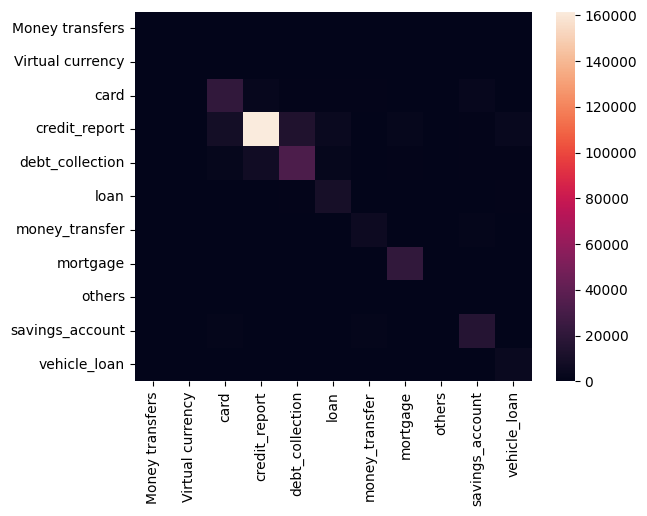

In [136]:
sns.heatmap(confusion_mat_df)
plt.show()

# Save Vectorizer and model object

In [142]:
with open("Pickle_Output/count_vect.pkl", "wb") as f:
    pickle.dump(vect, f)
with open("Pickle_Output/nb_model.pkl", "wb") as f:
    pickle.dump(model, f)

# Prediction

In [153]:
# Choosing random data to test.
test_complaint_1 = data_df["Complaint"][236]
test_complaint_2 = data_df["Complaint"][4808586]

In [154]:
test_complaint = [test_complaint_1, test_complaint_2]

## Load the vectorizer and Model Objects

In [156]:
vect = pickle.load(open("Pickle_Output/count_vect.pkl", "rb"))
model = pickle.load(open("Pickle_Output/nb_model.pkl", "rb"))

## Process test data

In [157]:
test_complaint = [c.lower() for c in test_complaint]

In [158]:
test_complaint

['i submitted an application for a credit card with bank of america in xxxx. account was approved and account opened. \nin the end of xxxx bank of america again ran my credit report and subsequently opened another credit card account that i did not request. \ni reported this fraudulent activity to bank of america and requested that the account be closed. xxxx hours later the account has still not been closed',
 "i sent capital one written correspondent about correcting a billing error on xx/xx/21 capital one responded with immediate closure of both my credit card account and reported it as closed to the credit reporting agencies causing me damages. pursuant to 15 u.s. code 1602 ( j ) the terms open end credit plan and open end consumer credit plan mean a plan under which the creditor reasonably contemplates repeated transactions, which prescribes the terms of such transactions, and which provides for a finance charge which may be computed from time to time on the outstanding unpaid bal

In [160]:
test_complaint = [word_tokenize(c) for c in test_complaint]

In [161]:
test_complaint = [[word for word in c if word not in stop_words] for c in test_complaint]

In [162]:
test_complaint = [["".join(tokenizer.tokenize(word)) for word in c
              if len(tokenizer.tokenize(word)) > 0] for c in test_complaint]

In [163]:
test_complaint = [[(word) for word in sent if ("xx") not in word] for sent in test_complaint]

In [164]:
test_complaint = [[porter_stemmer.stem(word) for word in sent] for sent in test_complaint]

In [165]:
clean_test_complaints = [" ".join(complaint) for complaint in test_complaint]

## Vectorize test data

In [166]:
X_test = vect.transform(clean_test_complaints)

## Make Predictions

In [167]:
model.predict(X_test)

array(['card', 'credit_report'], dtype='<U16')